In [2]:
import pandas as pd
import numpy as np

Mounted at /content/drive


In [3]:
df = pd.read_csv('../../jsbach_chorals_harmony.data')

In [4]:
Y = data['Chord label']
X = data.drop(['Chord label','Choral ID', 'Event number'], axis = 1)
feature_names = X.columns

In [5]:
#X.replace(('YES', 'NO'), (1, 0), inplace=True)
X

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4
5661,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3
5662,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5
5663,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42, shuffle=True)
paramGrid = {
              'criterion' : ["gini", "entropy", "log_loss"],
              'min_samples_split' : [2**i for i in range(1,3)],
              'max_features' : ['sqrt', 'log2'],
              'max_depth' : [10],
              'class_weight' : [None, 'balanced']
            }
          

In [8]:
oe = OrdinalEncoder()
oe.fit(X_train)
oe.categories_

[array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['A', 'A#', 'Ab', 'B', 'Bb', 'C', 'C#', 'D', 'D#', 'Db', 'E', 'Eb',
        'F', 'F#', 'G', 'G#'], dtype=object),
 array([1, 2, 3, 4, 5])]

In [9]:
X_train_transform = oe.transform(X_train)
X_test_transform = oe.transform(X_test)

In [10]:
searchModel = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=paramGrid, cv= 5, scoring='accuracy')

In [11]:
searchModel.fit(X_train_transform,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10], 'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4]},
             scoring='accuracy')

In [12]:
searchModel.best_score_

0.717780580075662

In [13]:
searchModel.best_params_

{'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 2}

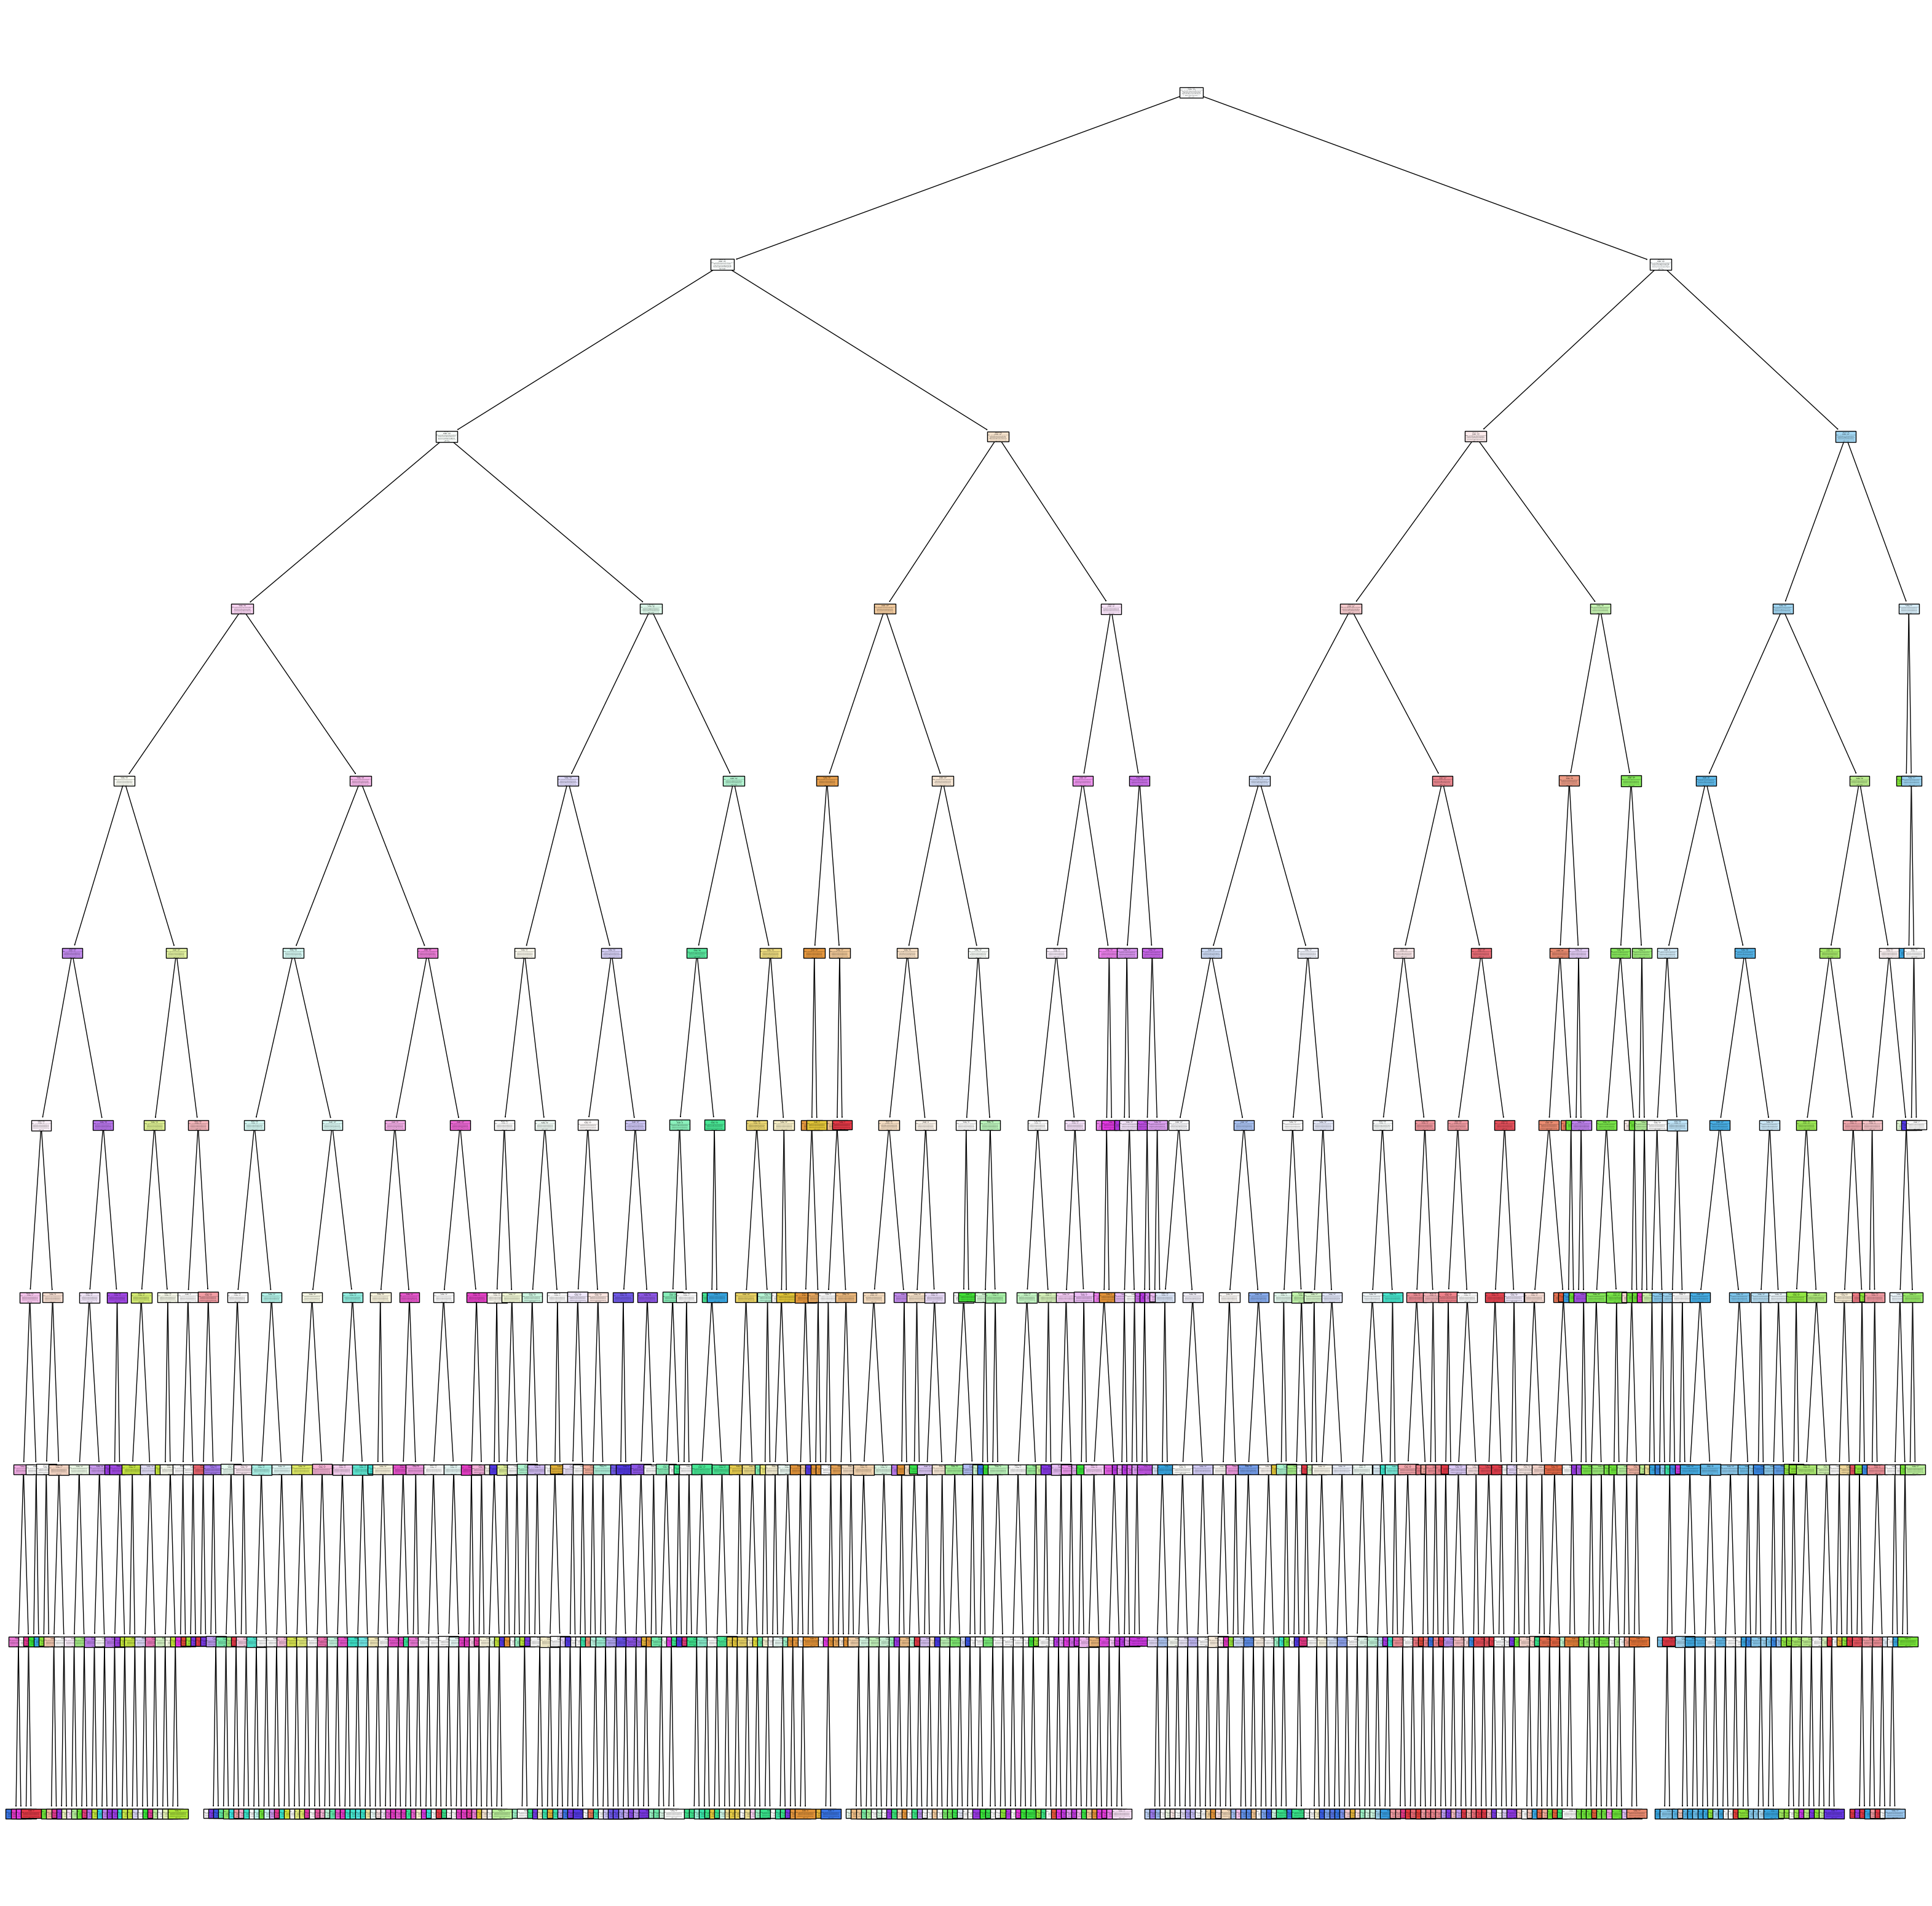

In [14]:
plt.figure(figsize=(40,40))
_ = plot_tree(searchModel.best_estimator_, feature_names=X_train.columns, class_names=y_train.unique(), filled=True)
plt.show()

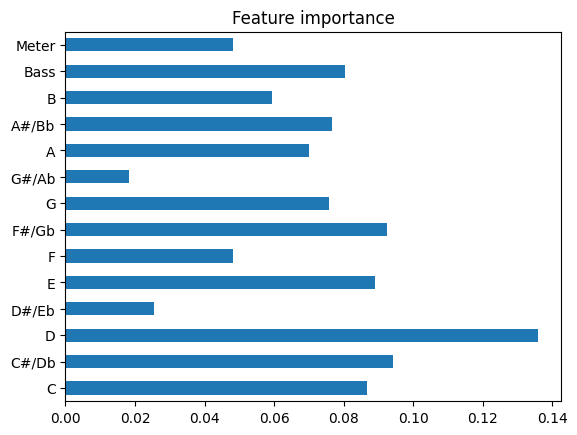

In [15]:
pd.Series(searchModel.best_estimator_.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [16]:
y_train_predicted = searchModel.best_estimator_.predict(X_train_transform)
cfm = confusion_matrix(y_train, y_train_predicted)
print("---------------------train------------------------------\n")
train_acc = accuracy_score(y_train, y_train_predicted)
print("accuracy score on train dataset: {}%\n".format(round(train_acc * 100,2)))
#class_report = classification_report(y_train, y_train_predicted)
#print(class_report)
cfm

---------------------train------------------------------

accuracy score on train dataset: 79.7%



array([[  2,   0,   0, ...,   0,   0,   0],
       [  0,   2,   1, ...,   0,   0,   0],
       [  0,   0, 234, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  98,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   6,   0,   5]])

In [17]:
y_test_predicted = searchModel.best_estimator_.predict(X_test_transform)
testCfmMatrix = confusion_matrix(y_test, y_test_predicted)
print("---------------------test------------------------------\n")
test_acc = accuracy_score(y_test, y_test_predicted)
print("accuracy score on train dataset: {}%\n".format(round(test_acc * 100,2)))
#class_report = classification_report(y_test, y_test_predicted)
#print(class_report)
testCfmMatrix

---------------------test------------------------------

accuracy score on train dataset: 69.06%



array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 75,  2, ...,  0,  0,  0],
       [ 0,  1,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 52,  0],
       [ 0,  0,  0, ...,  0,  2,  0]])

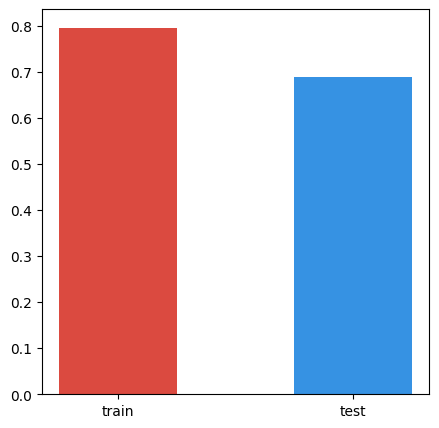

In [18]:
plt.figure(figsize=(5,5))
plt.bar(['train', 'test'], [train_acc,test_acc], color=['#db4a40', '#3692e3'], width=0.5, label='accuracy comparison')
plt.show()

In [19]:
cfm_df = pd.DataFrame(testCfmMatrix)
cfm_df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,75,2,0,0,1,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
2,0,1,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,3,0,0,0
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,52,0


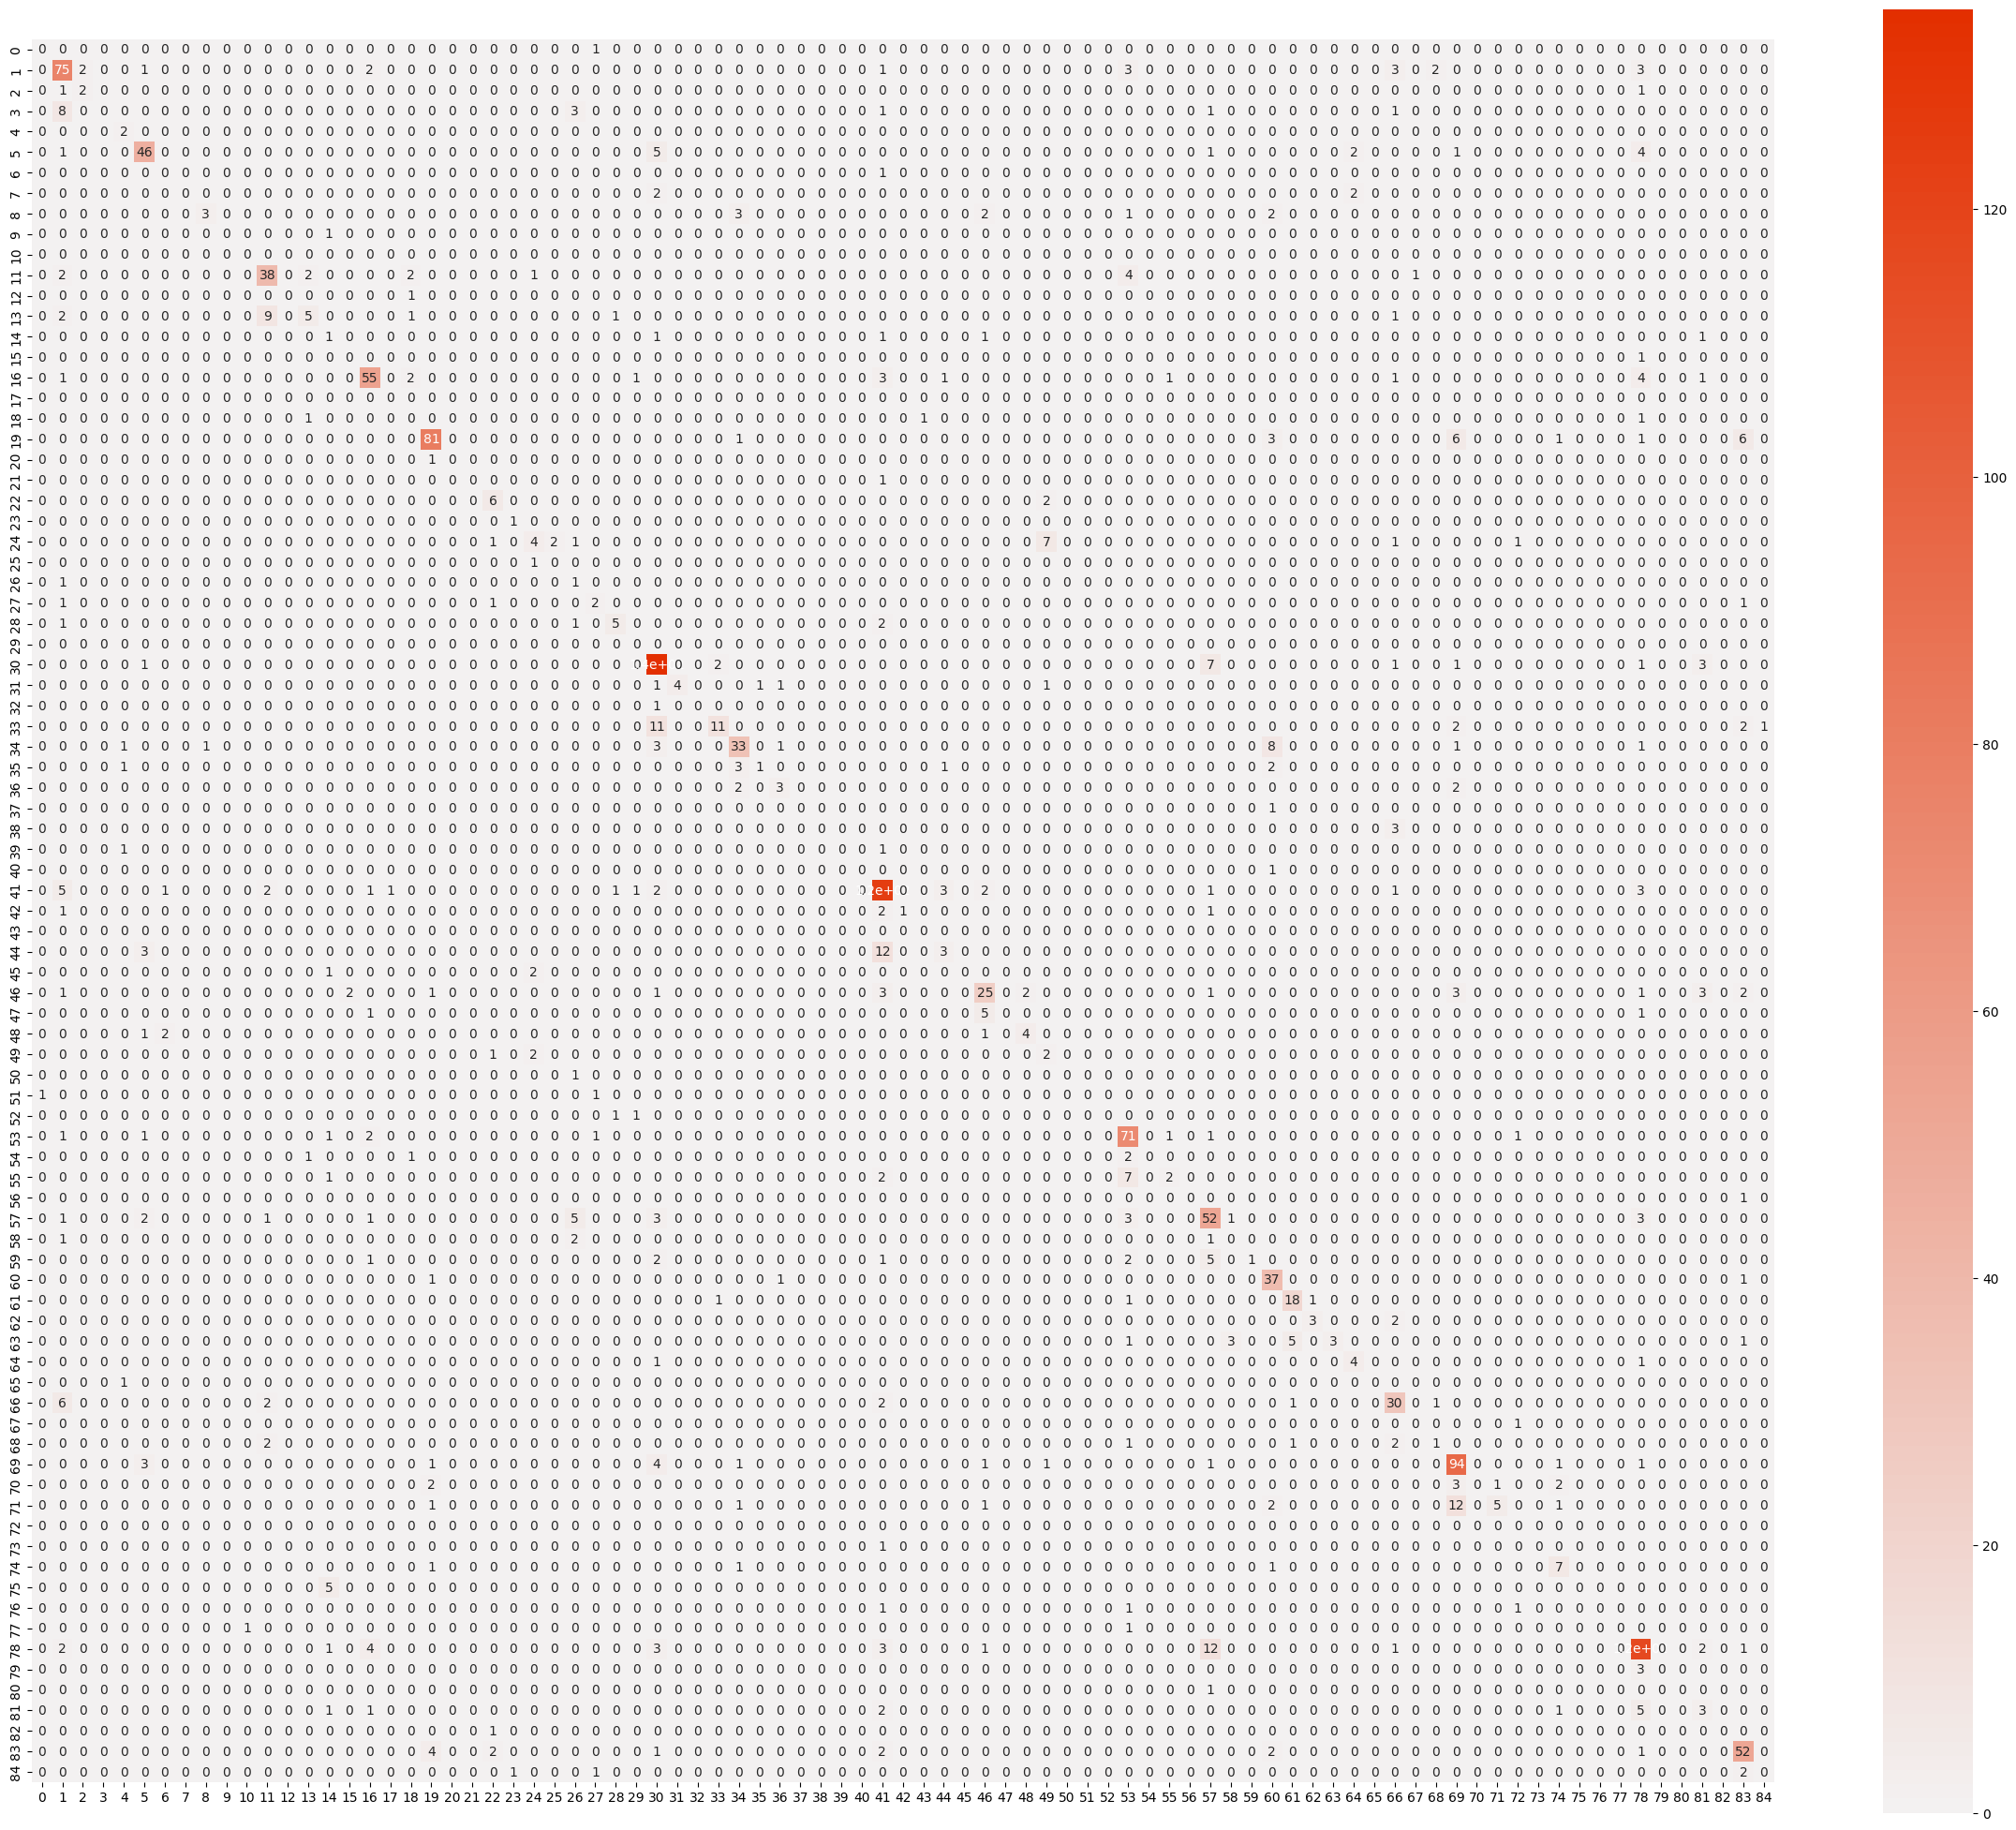

In [20]:
import seaborn as sns
import numpy as np

corr = cfm_df
mask = np.triu(np.ones_like(corr, dtype=bool),k=corr.shape[0])

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=100, l=50, center="light", as_cmap=True)

plt.figure(figsize=(30, 25))
sns.heatmap(corr, mask=mask, center=0, annot=True, square=True, cmap=cmap)

plt.show();

In [21]:
from sklearn.ensemble import RandomForestClassifier

paramGrid = {
              'criterion' : ["gini", "entropy", "log_loss"],
              'min_samples_split' : [2**i for i in range(1,4)],
               'min_samples_leaf': [2,3,4,5],
              'max_features' : ['sqrt', 'log2'],
              'max_depth' : [10],
              'class_weight' : [None, 'balanced'],
              'n_estimators' : [50,100,150]
            }
          

forestGridSearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=paramGrid, cv=5, scoring='accuracy')

In [22]:
forestGridSearch.fit(X_train_transform, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [23]:
forestGridSearch.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
forestGridSearch.best_score_

0.755359394703657

In [25]:
forestGridSearch.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [26]:
y_forest_train_predicted = forestGridSearch.best_estimator_.predict(X_train_transform)
train_forest_acc = accuracy_score(y_train, y_forest_train_predicted)
print("accuracy score on train dataset (RANDOM FOREST): {}%\n".format(round(train_forest_acc * 100,2)))

accuracy score on train dataset (RANDOM FOREST): 82.19%



In [27]:
y_forest_test_predicted = forestGridSearch.best_estimator_.predict(X_test_transform)
test_forest_acc = accuracy_score(y_test, y_forest_test_predicted)
print("accuracy score on test dataset (RANDOM FOREST): {}%\n".format(round(test_forest_acc * 100,2)))

accuracy score on test dataset (RANDOM FOREST): 72.71%



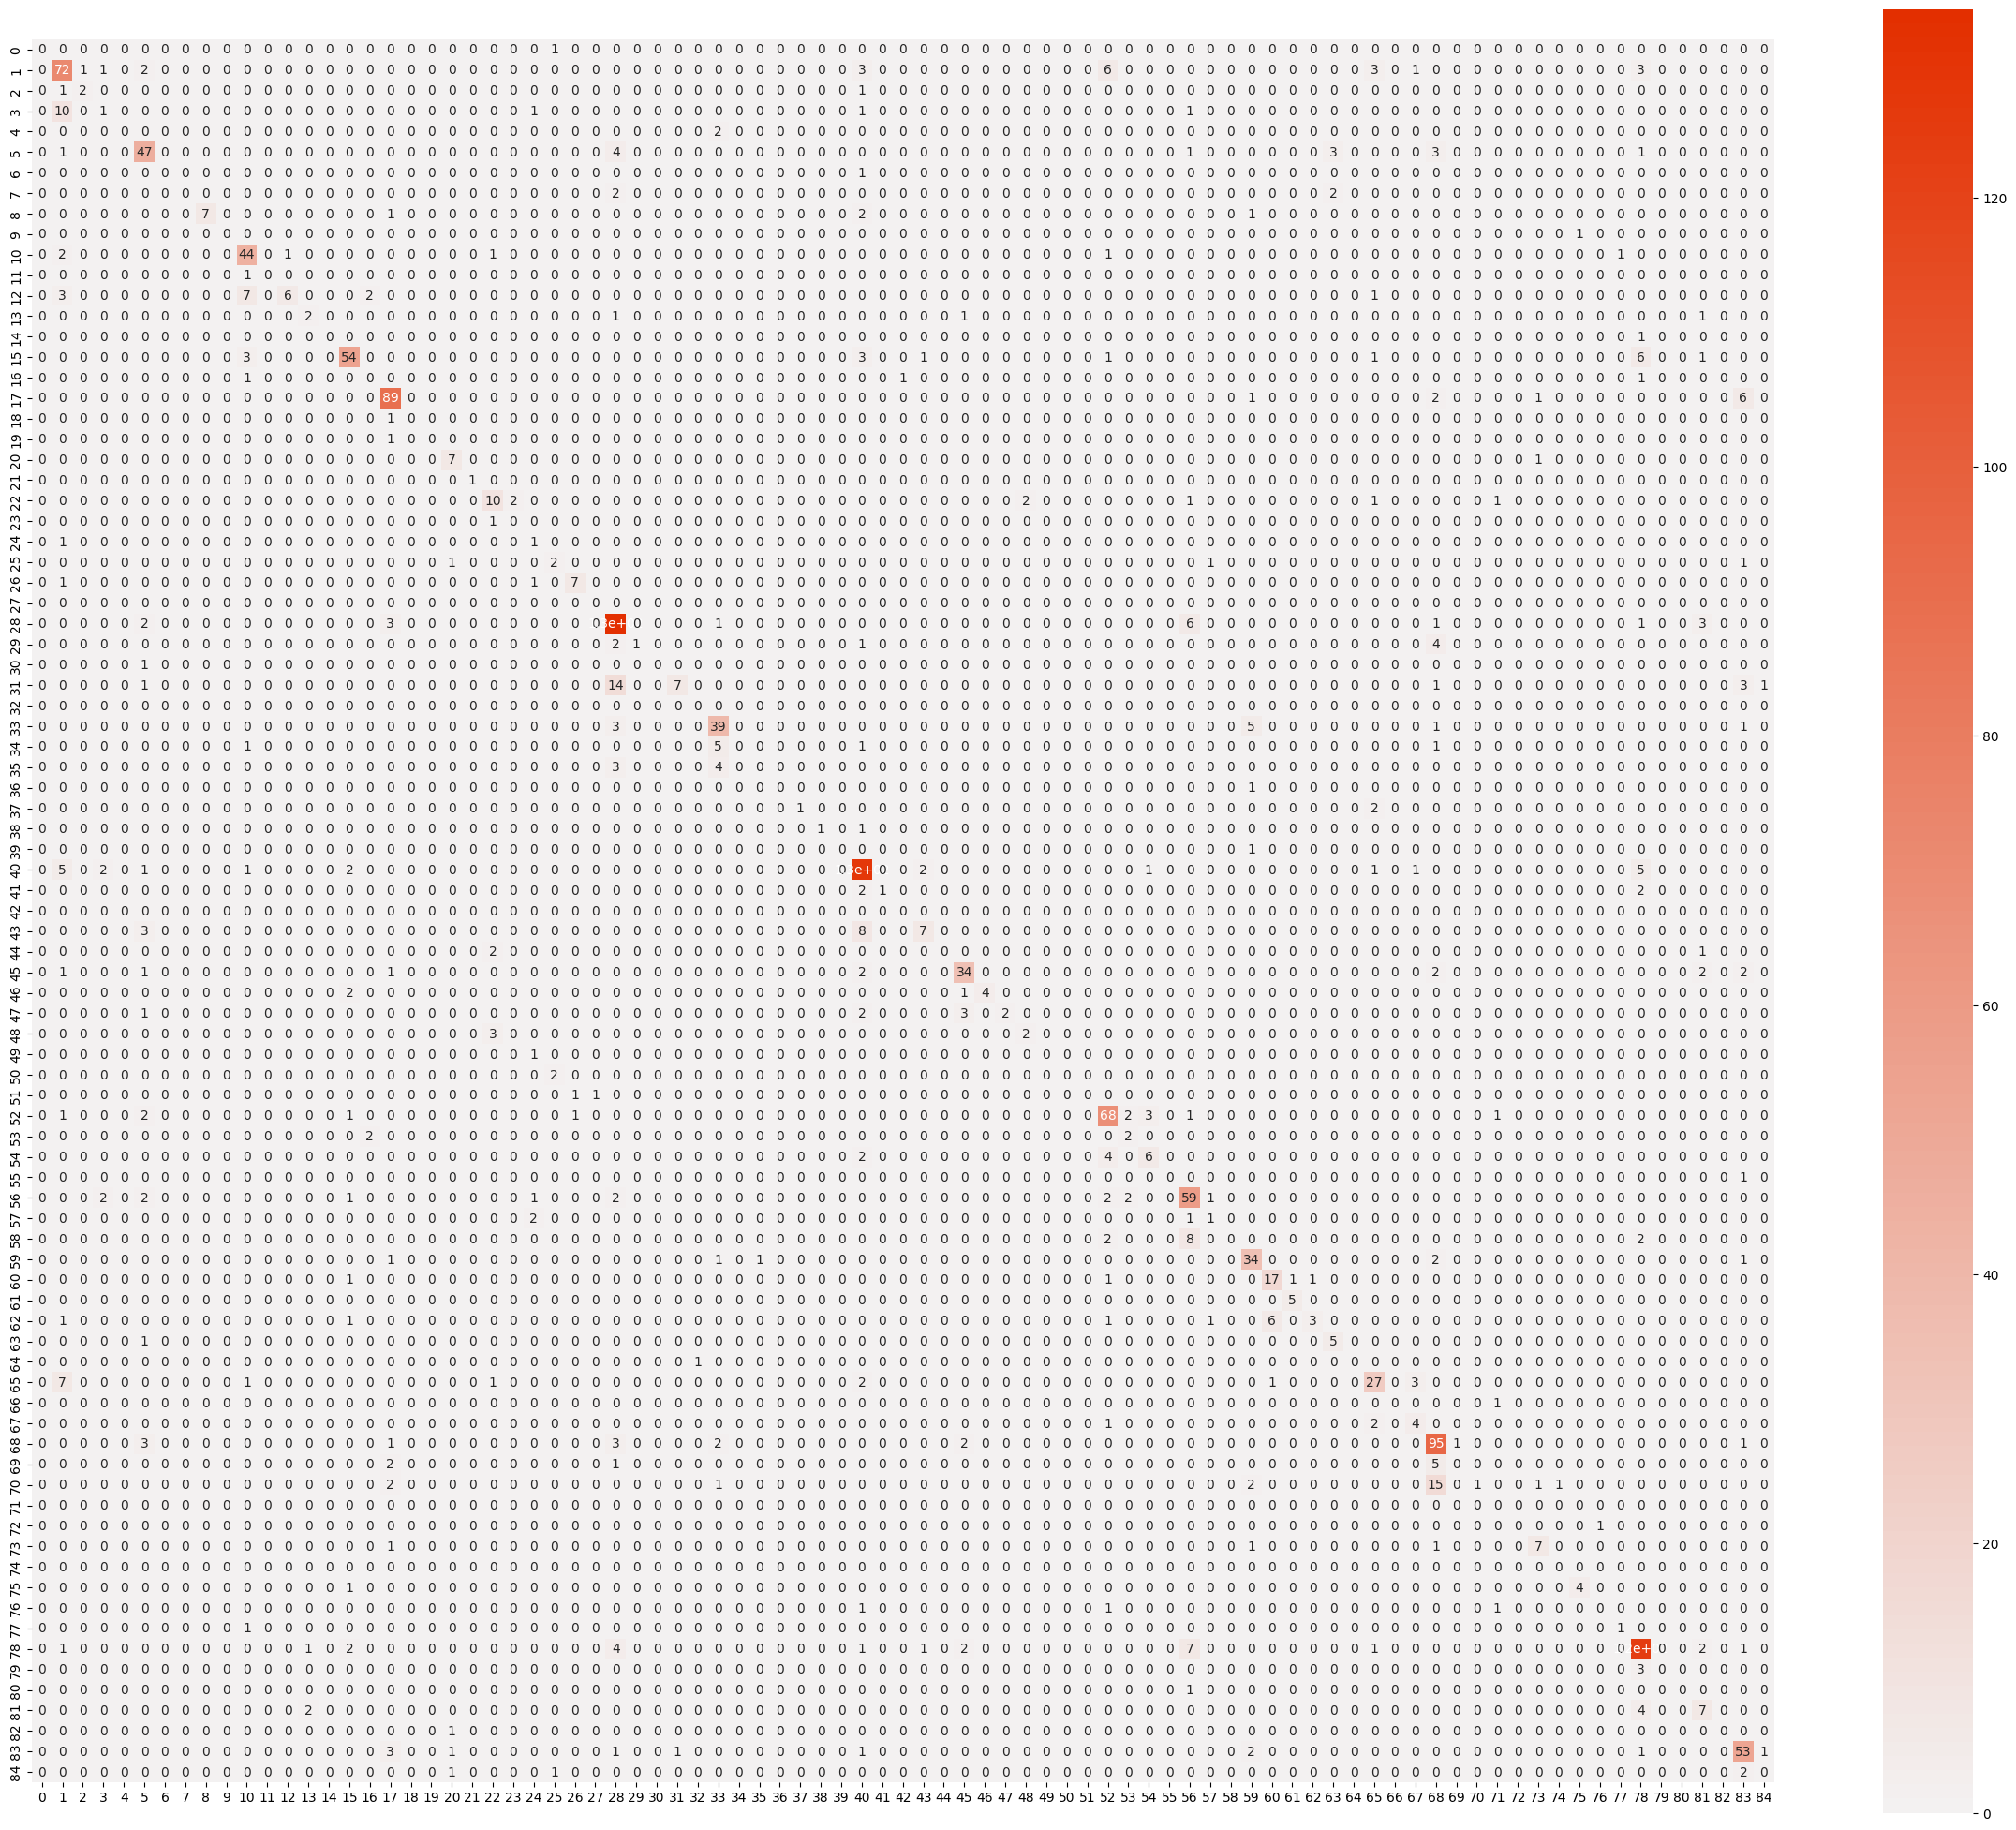

In [29]:
testCfmMatrix = confusion_matrix(y_test, y_forest_test_predicted)
cfm_df = pd.DataFrame(testCfmMatrix)

corr = cfm_df
mask = np.triu(np.ones_like(corr, dtype=bool),k=corr.shape[0])

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=100, l=50, center="light", as_cmap=True)

plt.figure(figsize=(30, 25))
sns.heatmap(corr, mask=mask, center=0, annot=True, square=True, cmap=cmap)


plt.show();

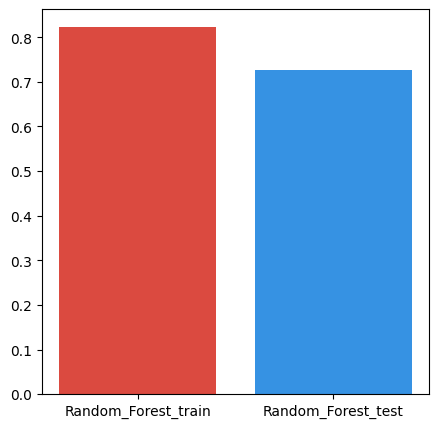

In [30]:
plt.figure(figsize=(5,5))
plt.bar(['Random_Forest_train', 'Random_Forest_test'], [train_forest_acc, test_forest_acc], color=['#db4a40', '#3692e3'])
plt.show()

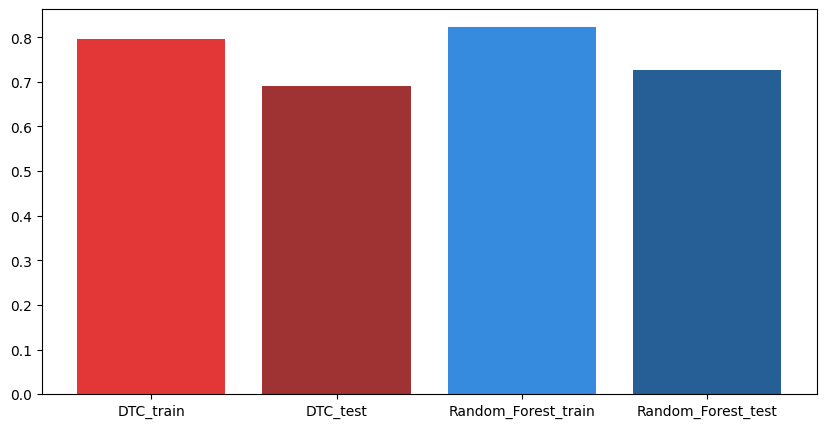

In [31]:
plt.figure(figsize=(10,5))
plt.bar(['DTC_train', 'DTC_test', 'Random_Forest_train', 'Random_Forest_test'], [train_acc, test_acc, train_forest_acc, test_forest_acc], color=['#e33636', '#9F3333', '#378bde', '#265e96'])
plt.show()

In [32]:
#NOTE: ROC curve plot can not be done here because it is not binary classification
#TODO: model export

In [33]:
import pickle
import os

currDirPath = "../ModelsExport/Classification"

models = [searchModel.best_estimator_, forestGridSearch.best_estimator_]
names = ['DCT_model.pkl', 'RandomForest_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(currDirPath,name),'wb') as file:
      pickle.dump(model,file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)
